<a href="https://colab.research.google.com/github/melainiess/Detecting-facial-expressions-from-images/blob/main/DFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q py-feat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.4/381.4 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 89.6 MB/s eta 0:00:00


This code sets up a face detection system using the "py-feat" library. It configures the system to use specific models for different tasks like face detection, landmark detection, expression analysis (au_model), emotion analysis, and face pose estimation. The "detector" object is created to perform these tasks.

In [2]:
from feat import Detector

detector = Detector(
    face_model="retinaface",
    landmark_model="mobilefacenet",
    au_model='xgb',
    emotion_model="resmasknet",
    facepose_model="img2pose",
)

detector

100%|██████████| 176/176 [00:00<00:00, 97813.37it/s]
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 111MB/s]


feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose)

BASTA FORDA Permit lang to para yung notebook to access yung GDrive files

In [15]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


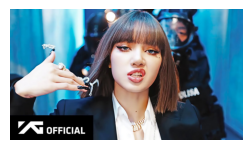

In [16]:
from feat.utils.io import get_test_data_path
from feat.plotting import imshow
import os

# Helper to point to the test data folder
test_data_dir = get_test_data_path()

# Get the full path
single_face_img_path = os.path.join(test_data_dir, "/content/drive/My Drive/Colab Notebooks/DFE/lisa2.jpg")

# Plot it
imshow(single_face_img_path)


In [17]:
single_face_prediction = detector.detect_image(single_face_img_path)

# Show results
single_face_prediction

100%|██████████| 1/1 [00:07<00:00,  7.52s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,553.961968,92.041097,281.397244,364.304915,0.998309,549.555192,549.417878,553.056891,559.362994,572.568227,...,0.078955,0.779062,0.092196,0.003205,0.003177,0.055229,0.014576,0.052554,/content/drive/My Drive/Colab Notebooks/DFE/li...,0


In [18]:
single_face_prediction.facebox

/usr/local/lib/python3.10/dist-packages/feat/data.py:618: DeprecationWarning: Fex.facebox has been renamed to Fex.faceboxes
  warnings.warn(


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore
0,553.961968,92.041097,281.397244,364.304915,0.998309


In [19]:
single_face_prediction.emotions

,anger,disgust,fear,happiness,sadness,surprise,neutral
0,0.779062,0.092196,0.003205,0.003177,0.055229,0.014576,0.052554


In [20]:
single_face_prediction.facepose # (in degrees)

/usr/local/lib/python3.10/dist-packages/feat/data.py:507: DeprecationWarning: Fex.facepose has now been renamed to Fex.poses
  warnings.warn(


,Pitch,Roll,Yaw
0,1.361349,5.397904,0.934193


In [21]:
single_face_prediction.to_csv("output.csv", index=False)

In [22]:
# prefer to pandas read_csv
from feat.utils.io import read_feat

input_prediction = read_feat("output.csv")

# Show results
input_prediction

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,553.961968,92.041097,281.397244,364.304915,0.998309,549.555192,549.417878,553.056891,559.362994,572.568227,...,0.078955,0.779062,0.092196,0.003205,0.003177,0.055229,0.014576,0.052554,/content/drive/My Drive/Colab Notebooks/DFE/li...,0


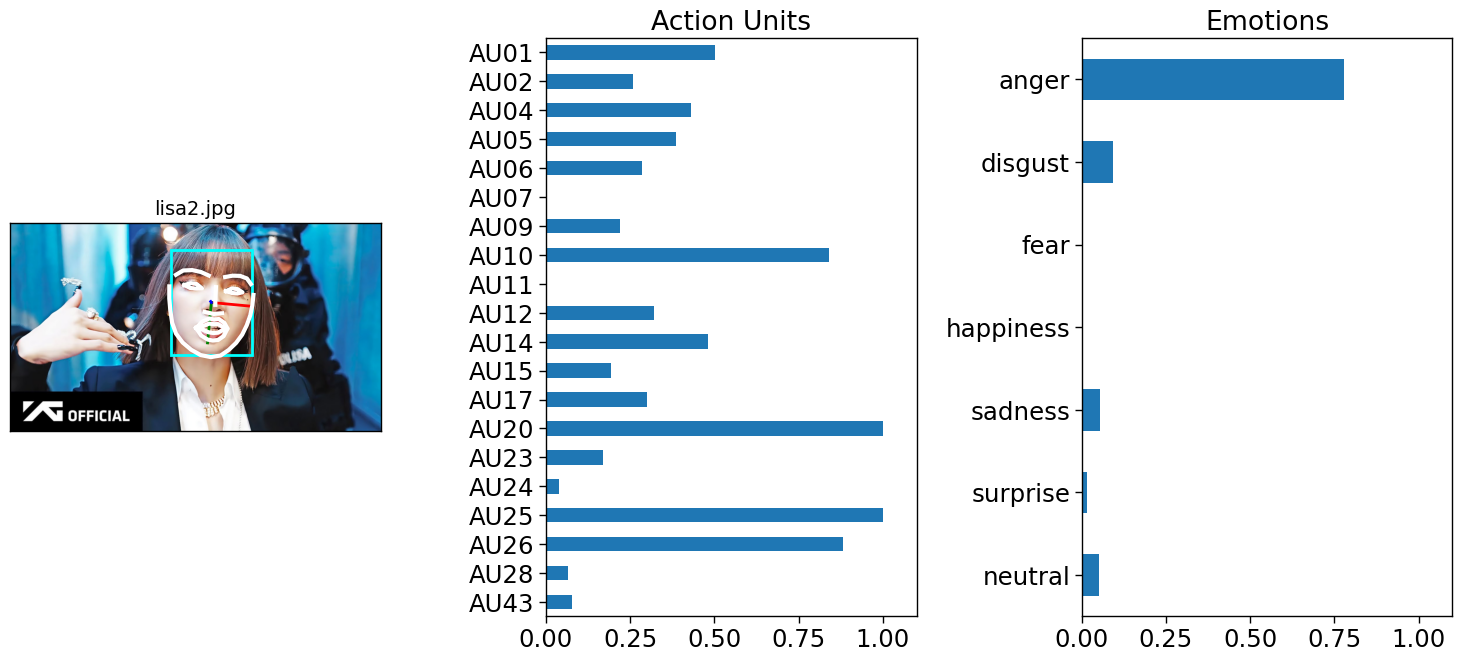

In [23]:
figs = single_face_prediction.plot_detections(poses=True)

100%|██████████| 20498112/20498112 [00:00<00:00, 160755305.33it/s]


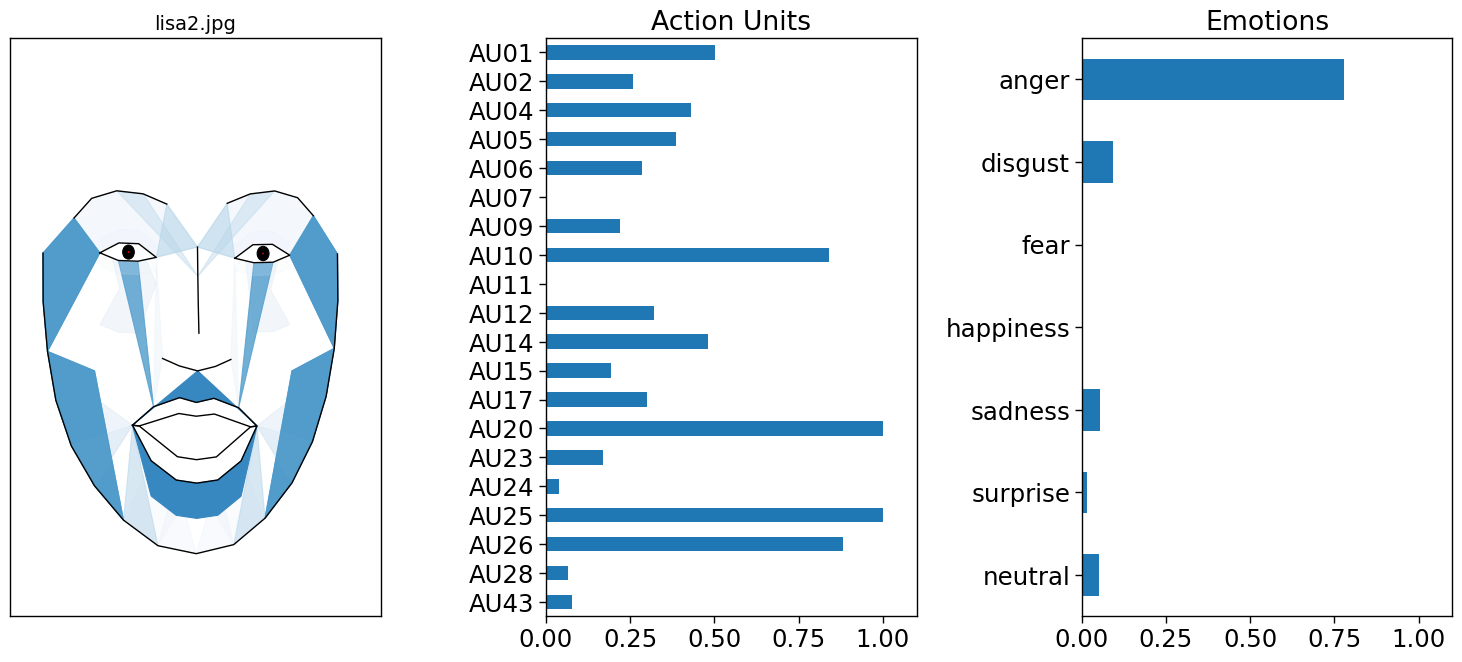

In [24]:
figs = single_face_prediction.plot_detections(faces='aus', muscles=True)

In [25]:
multi_face_image_path = os.path.join(test_data_dir, "/content/drive/My Drive/Colab Notebooks/DFE/bpGrp.jpg")
multi_face_prediction = detector.detect_image(multi_face_image_path)

# Show results
multi_face_prediction

100%|██████████| 1/1 [00:10<00:00, 10.77s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,150.430779,89.581306,69.679425,96.259602,0.998943,149.946278,151.410553,153.862504,157.344603,162.384395,...,0.035251,0.009041,0.000260,0.003768,0.869611,0.001061,0.006457,0.109801,/content/drive/My Drive/Colab Notebooks/DFE/bp...,0
1,272.151030,80.510818,65.763649,90.649681,0.997772,272.958971,273.567917,275.304282,278.220515,282.790815,...,0.034285,0.007672,0.000273,0.000168,0.096859,0.009183,0.007823,0.878022,/content/drive/My Drive/Colab Notebooks/DFE/bp...,0
2,44.073367,82.798526,72.399284,96.078277,0.997436,41.287200,42.970879,45.861250,50.050759,56.040296,...,0.048025,0.006157,0.000818,0.000345,0.595161,0.002778,0.005779,0.388963,/content/drive/My Drive/Colab Notebooks/DFE/bp...,0
3,411.656433,51.481117,82.176086,97.610723,0.992138,410.041680,414.001180,418.521737,424.265534,432.154383,...,0.340638,0.000304,0.000326,0.000354,0.979779,0.000799,0.014475,0.003963,/content/drive/My Drive/Colab Notebooks/DFE/bp...,0


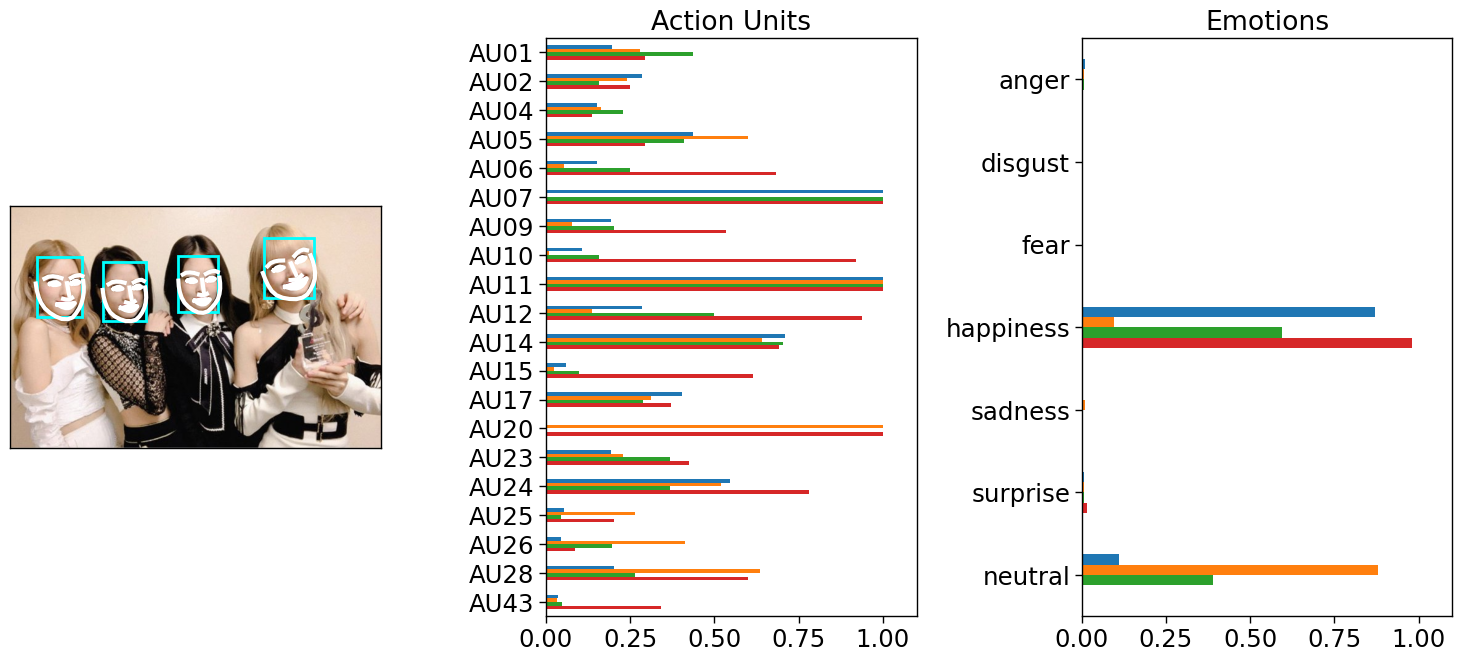

In [26]:
figs = multi_face_prediction.plot_detections(add_titles=False)

In [27]:
img_list = [single_face_img_path, multi_face_image_path]

mixed_prediction = detector.detect_image(img_list, batch_size=1)
mixed_prediction

100%|██████████| 2/2 [00:16<00:00,  8.17s/it]


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,553.961968,92.041097,281.397244,364.304915,0.998309,549.555192,549.417878,553.056891,559.362994,572.568227,...,0.078955,0.779062,0.092196,0.003205,0.003177,0.055229,0.014576,0.052554,/content/drive/My Drive/Colab Notebooks/DFE/li...,0
1,150.430779,89.581306,69.679425,96.259602,0.998943,149.946278,151.410553,153.862504,157.344603,162.384395,...,0.035251,0.009041,0.000260,0.003768,0.869611,0.001061,0.006457,0.109801,/content/drive/My Drive/Colab Notebooks/DFE/bp...,1
2,272.151030,80.510818,65.763649,90.649681,0.997772,272.958971,273.567917,275.304282,278.220515,282.790815,...,0.034285,0.007672,0.000273,0.000168,0.096859,0.009183,0.007823,0.878022,/content/drive/My Drive/Colab Notebooks/DFE/bp...,1
3,44.073367,82.798526,72.399284,96.078277,0.997436,41.287200,42.970879,45.861250,50.050759,56.040296,...,0.048025,0.006157,0.000818,0.000345,0.595161,0.002778,0.005779,0.388963,/content/drive/My Drive/Colab Notebooks/DFE/bp...,1
4,411.656433,51.481117,82.176086,97.610723,0.992138,410.041680,414.001180,418.521737,424.265534,432.154383,...,0.340638,0.000304,0.000326,0.000354,0.979779,0.000799,0.014475,0.003963,/content/drive/My Drive/Colab Notebooks/DFE/bp...,1


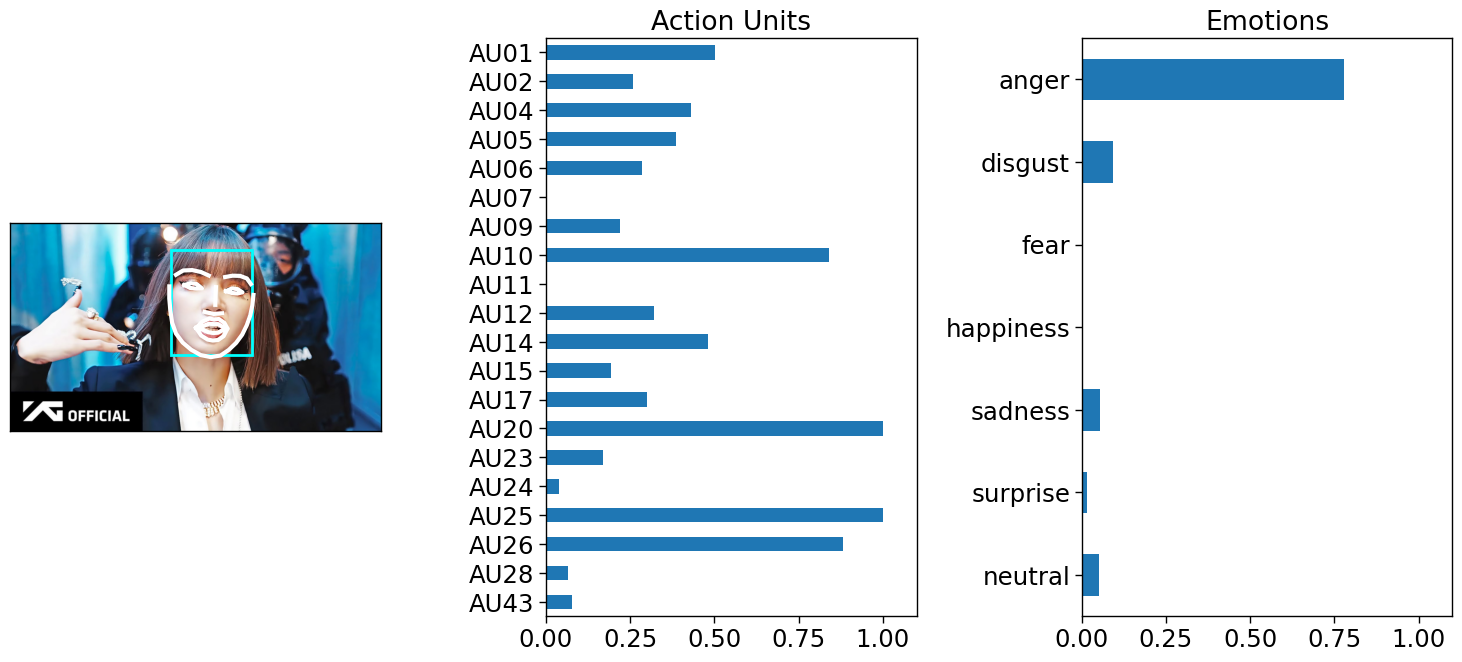

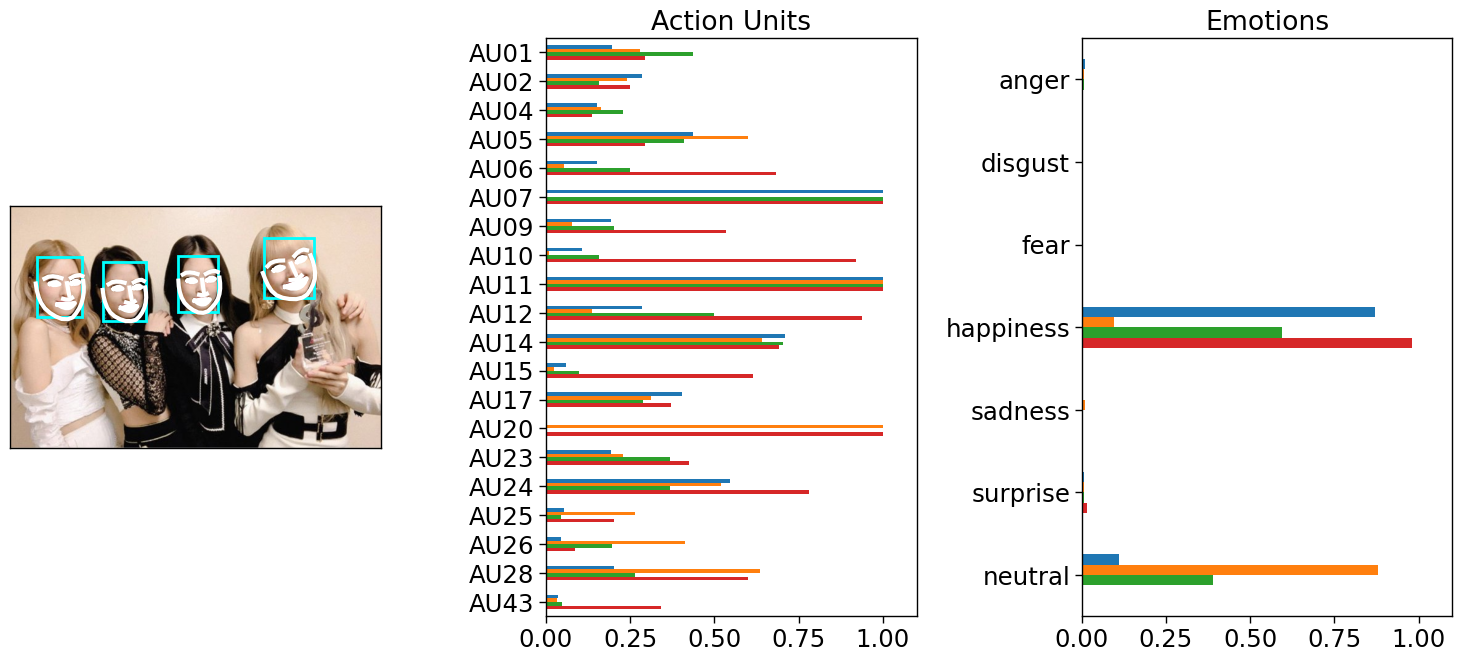

In [28]:
figs = mixed_prediction.plot_detections(add_titles=False)

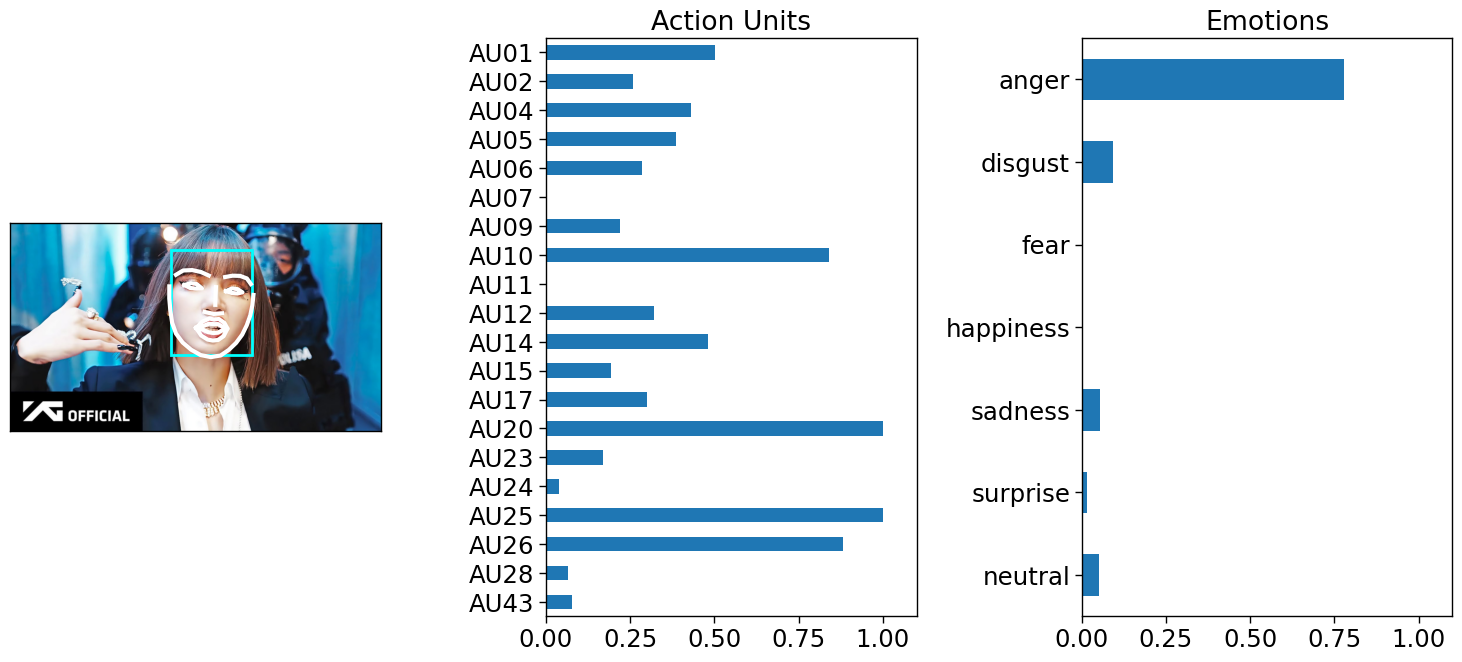

In [29]:
# Just plot the detection corresponding to the first row in the Fex data
figs = mixed_prediction.loc[0].plot_detections(add_titles=False)

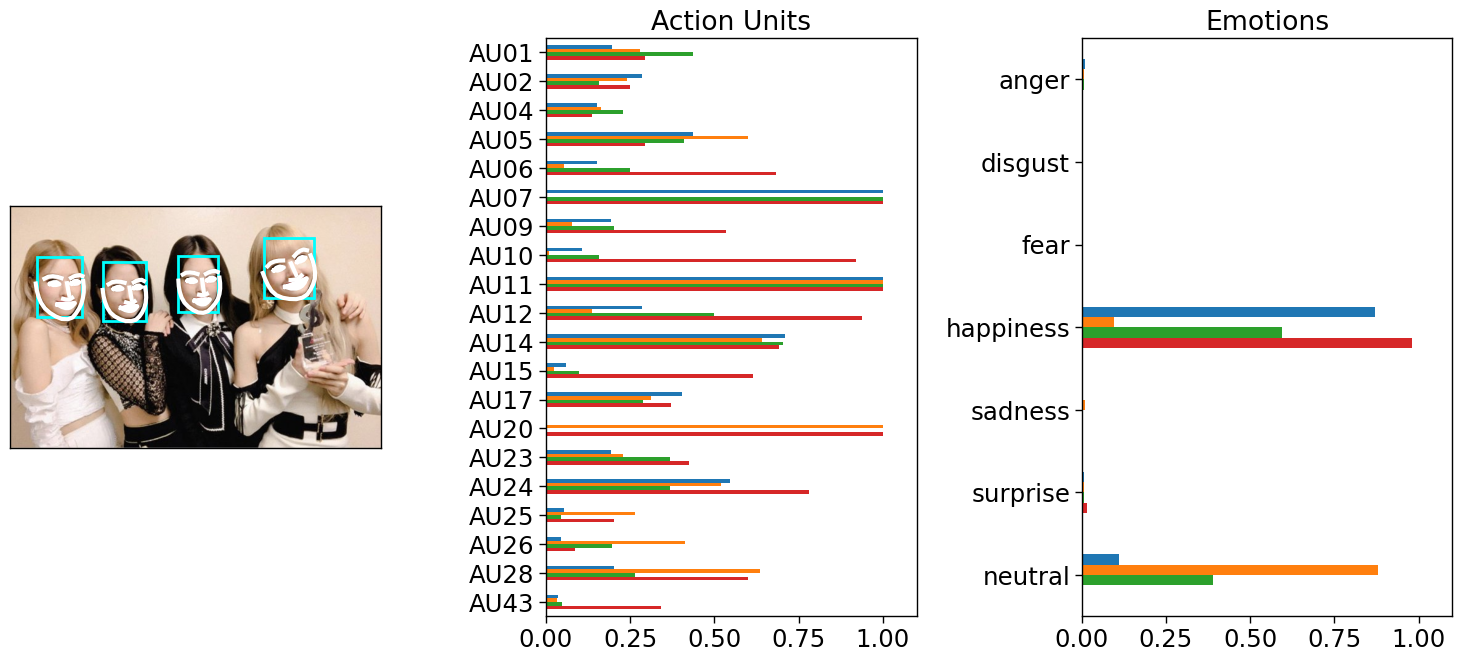

In [30]:
# Choose plot based on image file name
img_name = mixed_prediction['input'].unique()[1]
axes = mixed_prediction.query("input == @img_name").plot_detections(add_titles=False)